***
# Fundamentals of Data Analytics Assessment - CAO Points Analysis

***

![img](images/cao_logo.png)

<br>

"The purpose of the Central Applications Office (CAO) is to process centrally applications for undergraduate courses in Irish Higher Education Institutions" [1]. 

<br>

<br>

<br>

<br>

<br>

<br>

#### Importing Libraries 

<br>

In [1]:
# Convenient HTTP requests.
import requests as rq

# Regular expressions.
import re

# Dates and times.
import datetime as dt

# Data frames.
import pandas as pd

# Working with data
import numpy as np

# For downloading.
import urllib.request as urlrq

# Visualisation
import matplotlib.pyplot as plt

# Visualisation
import seaborn as sns

<br>

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Selecting a colour scheme.
plt.style.use('ggplot')

# Configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

<br>

In [3]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

<br>

<br>

<br>

****

## 2021 CAO Points
[2021 CAO points]('http://www2.cao.ie/points/l8.php')
***


### Level 8

<br>

#### Server Request

<br>

In [4]:
###### Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# 200 = ok. 404 = error: not found
resp

<Response [200]>

<br>

<br>

### Save Orignal Dataset

***

<br>

In [5]:
# Create a file path for the original data.
pathhtml = 'datasets/cao2021_' + nowstr + '.html'

<br>

<br>

### Webserver Error

***

<br>

<br>

Webserver error - server says decode as:

    Content-Type: text/html; charset=iso-8859-1
However, one line uses \x96 which isn't defined in iso-8859-1. 

Therefore, a similar decoding standard cp1252 was used. It is similar but inculdes #\x96

<br>

<br>

In [6]:
# Fixing the webserves wrong encoding
original_encoding = resp.encoding

# Changing to cp1252
resp.encoding = 'cp1252'

<br>

<br>

In [7]:
# Save the original html file.
with open(pathhtml, 'w') as f: # Opening path in write mode
    f.write(resp.text)

<br>

<br>

### Getting relevant data using Regular expressions

***

[Regular Expression Documentation]('https://docs.python.org/3/library/re.html')

<br>

To get the relevant lines from the response request, we use a regular expression. It is more efficent that recalling the expression everytime.

<br>

<br>

In [8]:
# Compile regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') # r for raw data

<br>

<br>

Loop through the response for matches 

<br>

<br>

<br>

<br>

In [9]:
# Path to csv file
path2021 = 'datasets/cao2021_csv_' + nowstr + '.csv'

<br>

<br>

In [10]:
# KTracking number of courses matched
no_lines = 0



# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5] # i.e first 5 characters
            # The course title.
            course_title = dline[7:57].strip() # Strip gets rid of whitespace
            # Round one points.
            course_points = re.split(' +', dline[60:]) # split into substringd from index 60 
            if len(course_points) != 2: # This is because last course has an extra substring
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

            
            
            
            
# Number of courses matched
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


<br>

<br>

NB: it was verified as of 03/11/2021 that there were 949 courses exactly in the CAO 2021 points list.

<br>

<br>

In [11]:
# Reading dataframe
df2021 = pd.read_csv(path2021, encoding='cp1252')

<br>

<br>

In [12]:
# Checking dataframe
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

<br>

In [13]:
# Creating a new column at the second index with the value 8
#df2021.insert(2, 'level', '8')

In [14]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

<br>

<br>

<br>

### Level 6/7 Courses

<br>

<br>

#### Server Request

<br>

In [15]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l76.php')

# 200 = ok. 404 = error: not found
resp

<Response [200]>

<br>

<br>

### Save Orignal Dataset

***

<br>

In [16]:
# Create a file path for the original data.
pathhtml = 'datasets/cao2021_2' + nowstr + '.html'

<br>

<br>

### Webserver Error

***

<br>

<br>

Webserver error - server says decode as:

    Content-Type: text/html; charset=iso-8859-1
However, one line uses \x96 which isn't defined in iso-8859-1. 

Therefore, a similar decoding standard cp1252 was used. It is similar but inculdes #\x96

<br>

<br>

In [17]:
# Fixing the webserves wrong encoding
original_encoding = resp.encoding

# Changing to cp1252
resp.encoding = 'cp1252'

<br>

<br>

In [18]:
# Save the original html file.
with open(pathhtml, 'w') as f: # Opening path in write mode
    f.write(resp.text)

<br>

<br>

### Getting relevant data using Regular expressions

***

[Regular Expression Documentation]('https://docs.python.org/3/library/re.html')

<br>

To get the relevant lines from the response request, we use a regular expression. It is more efficent that recalling the expression everytime.

<br>

<br>

In [19]:
# Compile regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)') # r for raw data

<br>

<br>

Loop through the response for matches 

<br>

<br>

In [20]:
# Path to csv file
path2021_2 = 'datasets/cao2021_2_csv_' + nowstr + '.csv'

<br>

<br>

In [21]:
# KTracking number of courses matched
no_lines = 0



# Open the csv file for writing.
with open(path2021_2, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')


            
# Number of courses matched
print(f"Total number of lines is {no_lines}.")

Total number of lines is 416.


<br>

<br>

NB: it was verified as of 03/11/2021 that there were 949 courses exactly in the CAO 2021 points list.

<br>

<br>

In [22]:
# Reading dataframe
df2021_2 = pd.read_csv(path2021_2, encoding='cp1252')

<br>

<br>

In [23]:
# Checking dataframe
df2021_2

,code,title,pointsR1,pointsR2
0,AL605,Music and Instrument Technology,211,NaN
1,AL630,Pharmacy Technician,308,NaN
2,AL631,Dental Nursing,311,NaN
3,AL632,Applied Science,297,NaN
4,AL650,Business,AQA,AQA
...,...,...,...,...
411,WD188,Applied Health Care,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
413,WD206,Electronic Engineering,180,NaN
414,WD207,Mechanical Engineering,172,NaN


<br>

<br>

In [24]:
# Creating a new column at the second index
df2021_2.insert(2, 'level', '6/7')

In [25]:
df2021_2

,code,title,level,pointsR1,pointsR2
0,AL605,Music and Instrument Technology,6/7,211,NaN
1,AL630,Pharmacy Technician,6/7,308,NaN
2,AL631,Dental Nursing,6/7,311,NaN
3,AL632,Applied Science,6/7,297,NaN
4,AL650,Business,6/7,AQA,AQA
...,...,...,...,...,...
411,WD188,Applied Health Care,6/7,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,6/7,AQA,262v
413,WD206,Electronic Engineering,6/7,180,NaN
414,WD207,Mechanical Engineering,6/7,172,NaN


<br>

<br>

<br>

***

## 2020 Points
***

https://www.cao.ie/index.php?page=points&p=2020

<br>

<br>

Level 6, 7 and 8 courses are inculded in the same excel file

<br>

<br>

In [26]:
# Getting url 
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

<br>

Save Original File

<br>

<br>

In [27]:
# Create a file path for the original data.
pathxlsx = 'datasets/cao2020_' + nowstr + '.xlsx'

<br>

<br>

In [28]:
# Fetching data
urlrq.urlretrieve(url2020, pathxlsx)

('datasets/cao2020_20211201_221803.xlsx',
 <http.client.HTTPMessage at 0x1ae210cf2e0>)

<br>

<br>

Load Spreadsheet using pandas

<br>

<br>

In [29]:
# Download and parse the excel spreadsheet. First few rows where a blurb
df2020 = pd.read_excel(url2020, skiprows=10)


<br>

<br>

In [30]:
#df2020.columns = ['Code', 'Title']

In [31]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

<br>

In [32]:
df2020['LEVEL'] = df2020['LEVEL'].astype(str)

<br>

<br>

In [33]:
# Checking random row
df2020.iloc[1000]

CATEGORY (i.e.ISCED description)    Engineering and engineering trades
COURSE TITLE                                    Mechanical Engineering
COURSE CODE2                                                     SG333
R1 POINTS                                                          216
R1 Random *                                                        NaN
R2 POINTS                                                          NaN
R2 Random*                                                         NaN
EOS                                                                216
EOS Random *                                                       NaN
EOS Mid-point                                                      347
LEVEL                                                                7
HEI                                     Institute of Technology, Sligo
Test/Interview #                                                   NaN
avp                                                                NaN
v     

<br>

<br>

In [34]:
# -1 is always last row/element
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

<br>

<br>

In [35]:
# Create a file path for the pandas data.
path2020 = 'datasets/cao2020_' + nowstr + '.csv'

<br>

<br>

In [36]:
# Save pandas data frame to disk.
df2020.to_csv(path2020)

<br>

<br>

<br>

<br>

***

## 2019 Points
***

https://www.cao.ie/index.php?page=points&p=2019

<br>

<br>

In [37]:
# For scraping data from pdf
import camelot

<br>

<br>

In [38]:
# Checking all pages of pdf for data
pdf = camelot.read_pdf('datasets/2019_points.pdf', pages='all')

<br>

<br>

In [39]:
# Checking the type
print(type(pdf))

<class 'camelot.core.TableList'>


<br>

<br>

In [40]:
# Checking the number of tables, should be 18
pdf

<TableList n=18>

<br>

<br>

In [41]:
# Exporting tables into a csv file
pdf.export('datasets/2019_points.csv', f='csv', compress=True)

<br>

<br>

In [42]:
# checking to make sure it worked
pdf[1].parsing_report

{'accuracy': 100.0, 'whitespace': 2.73, 'order': 1, 'page': 2}

<br>

<br>

In [43]:
# Unzipping the folder - multiple tables are exported as a zip
from zipfile import ZipFile

# Loop through zipped folder for files
with ZipFile('datasets/2019_points.zip', 'r') as df:
   # Extract all the contents of zip file in current directory
   df.extractall('2019_points')

<br>

<br>

In [44]:
# To merge csv files into one
import os, glob

# Creating a path
path = '2019_points/'

<br>

<br>

In [45]:
# Find csvs which match this pattern
filelist = glob.glob(path + '2019_*.csv')

# Merge them together with these column headings
df2019 = pd.concat([pd.read_csv(file, names=['code','title','points','median' ]) for file in filelist])

<br>

<br>

In [46]:
# Checking pandas dataframe
df2019

,code,title,points,median
0,Course Code INSTITUTION and COURSE,NaN,EOS,Mid
1,NaN,Athlone Institute of Technology,NaN,NaN
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
...,...,...,...,...
50,TR032,Engineering,487*,520.0
51,TR033,Computer Science,465*,488.0
52,TR034,Management Science and Information Systems Stu...,589*,602.0
53,TR035,Theoretical Physics,554,601.0


<br>

<br>

In [47]:
# Creating a new column at the second index
df2019.insert(2, 'level', '8')

<br>

In [48]:
# Checking last 5 rows
df2019.tail()

,code,title,level,points,median
50,TR032,Engineering,8,487*,520.0
51,TR033,Computer Science,8,465*,488.0
52,TR034,Management Science and Information Systems Stu...,8,589*,602.0
53,TR035,Theoretical Physics,8,554,601.0
54,TR038,Engineering with Management,8,499,543.0


<br>

<br>

In [49]:
# Getting rid of rows containing institute names only
df2019 = df2019[df2019['code'].notnull()]

In [50]:
df2019

,code,title,level,points,median
0,Course Code INSTITUTION and COURSE,NaN,8,EOS,Mid
2,AL801,Software Design with Virtual Reality and Gaming,8,304,328
3,AL802,Software Design with Cloud Computing,8,301,306
4,AL803,Software Design with Mobile Apps and Connected...,8,309,337
5,AL805,Network Management and Cloud Infrastructure,8,329,442
...,...,...,...,...,...
50,TR032,Engineering,8,487*,520.0
51,TR033,Computer Science,8,465*,488.0
52,TR034,Management Science and Information Systems Stu...,8,589*,602.0
53,TR035,Theoretical Physics,8,554,601.0


<br>

<br>

In [51]:
# Dropping old heading
df2019.drop(0)

,code,title,level,points,median
2,AL801,Software Design with Virtual Reality and Gaming,8,304,328
3,AL802,Software Design with Cloud Computing,8,301,306
4,AL803,Software Design with Mobile Apps and Connected...,8,309,337
5,AL805,Network Management and Cloud Infrastructure,8,329,442
6,AL810,Quantity Surveying,8,307,349
...,...,...,...,...,...
50,TR032,Engineering,8,487*,520.0
51,TR033,Computer Science,8,465*,488.0
52,TR034,Management Science and Information Systems Stu...,8,589*,602.0
53,TR035,Theoretical Physics,8,554,601.0


<br>

<br>

<br>

<br>

### Level 6 & 7 Courses
http://www2.cao.ie/points/lvl76_19.pdf

<br>

In [52]:
# Checking all pages of pdf for data
pdf_2 = camelot.read_pdf('datasets/2019_points_2.pdf', pages='all')

<br>

<br>

In [53]:
# Checking the type
print(type(pdf_2))

<class 'camelot.core.TableList'>


<br>

<br>

In [54]:
# Checking the number of tables, should be 10
pdf_2

<TableList n=10>

<br>

<br>

In [55]:
# Exporting tables into a csv file
pdf_2.export('datasets/2019_points_2.csv', f='csv', compress=True)

<br>

<br>

In [56]:
# checking to make sure it worked
pdf_2[3].parsing_report

{'accuracy': 100.0, 'whitespace': 9.26, 'order': 1, 'page': 4}

<br>

<br>

In [57]:
# Unzipping the folder - multiple tables are exported as a zip
# Loop through zipped folder for files
with ZipFile('datasets/2019_points_2.zip', 'r') as df:
   # Extract all the contents of zip file in current directory
   df.extractall('2019_points_2')

<br>

<br>

In [58]:
# Creating a path
path = '2019_points_2/'

<br>

<br>

In [59]:
# Find csvs which match this pattern
filelist = glob.glob(path + '2019_*.csv')

# Merge them together with these column headings. Leaving blurb from pdf without skiprows
df2019_2 = pd.concat([pd.read_csv(file, names=['code','title','points','median'], skiprows=10) for file in filelist])

<br>

In [60]:
# Creating a new column at the second index
df2019_2.insert(2, 'level', '6/7')

<br>

In [61]:
# Checking pandas dataframe
df2019_2

,code,title,level,points,median
0,AL600,Software Design,6/7,205,306.0
1,AL601,Computer Engineering,6/7,196,272.0
2,AL602,Mechanical Engineering,6/7,258,424.0
3,AL604,Civil Engineering,6/7,252,360.0
4,AL630,Pharmacy Technician,6/7,306,366.0
...,...,...,...,...,...
40,WD173,Hospitality Studies,6/7,182.0,278.0
41,WD174,Tourism,6/7,134.0,282.0
42,WD175,Pharmaceutical Science,6/7,207.0,367.0
43,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7,NaN,413.0


<br>

<br>

In [62]:
# Getting rid of rows containing institute names only
df2019_2 = df2019_2[df2019_2['code'].notnull()]

In [63]:
df2019_2

,code,title,level,points,median
0,AL600,Software Design,6/7,205,306.0
1,AL601,Computer Engineering,6/7,196,272.0
2,AL602,Mechanical Engineering,6/7,258,424.0
3,AL604,Civil Engineering,6/7,252,360.0
4,AL630,Pharmacy Technician,6/7,306,366.0
...,...,...,...,...,...
40,WD173,Hospitality Studies,6/7,182.0,278.0
41,WD174,Tourism,6/7,134.0,282.0
42,WD175,Pharmaceutical Science,6/7,207.0,367.0
43,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7,NaN,413.0


<br>

<br>

In [64]:
# Checking random row
df2019_2.iloc[25]

code         AL752
title     Business
level          6/7
points         232
median       387.0
Name: 25, dtype: object

<br>

<br>

<br>

<br>

<br>

***
### Cleaning Up Dataframes & Data 
***

<br>

<br>

### 2021

<br>

In [66]:
# Selecting columns level 8
level_8_2021 = df2021[['code', 'title',  'pointsR1', 'pointsR2']]

In [67]:
# Selecting columns level 6/7
level_6_2021 = df2021_2[['code', 'title', 'level',  'pointsR1', 'pointsR2']]

<br>

<br>

In [68]:
# Concatenating level 8 and 6/7 2021 courses
total2021 = pd.concat([level_8_2021, level_6_2021], ignore_index=True)

In [69]:
total2021

,code,title,pointsR1,pointsR2,level
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN,NaN
4,AL810,Quantity Surveying,328,NaN,NaN
...,...,...,...,...,...
1360,WD188,Applied Health Care,220,NaN,6/7
1361,WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v,6/7
1362,WD206,Electronic Engineering,180,NaN,6/7
1363,WD207,Mechanical Engineering,172,NaN,6/7


<br>

<br>

In [70]:
# Search for duplicates
total2021[total2021.duplicated()]

,code,title,pointsR1,pointsR2,level


<br>

<br>

<br>

### 2020

<br>

In [71]:
# Selecting coloumns
total2020 = df2020[['COURSE CODE2','COURSE TITLE', 'LEVEL']]

# Renaming columns
total2020.columns = ['code', 'title', 'level']

In [72]:
total2020

,code,title,level
0,AC120,International Business,8
1,AC137,Liberal Arts,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",8
3,AD102,Graphic Design and Moving Image Design (portfo...,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,8
...,...,...,...
1459,WD208,Manufacturing Engineering,7
1460,WD210,Software Systems Development,8
1461,WD211,Creative Computing,8
1462,WD212,Recreation and Sport Management,8


<br>

<br>

In [73]:
# Search for duplicates
total2020[total2020.duplicated()]

,code,title,level


<br>

<br>

### 2019

<br>

In [74]:
# Selecting columns level 8
level_8_2019 = df2019[['code', 'title', 'level', 'points']]

In [75]:
# Selecting columns level 6/7
level_6_2019 = df2019_2[['code', 'title', 'level', 'points']]

<br>

<br>

In [76]:
# Concatenating level 8 and 6/7 2021 courses
total2019= pd.concat([level_8_2019, level_6_2019], ignore_index=True)

In [77]:
total2019

,code,title,level,points
0,Course Code INSTITUTION and COURSE,NaN,8,EOS
1,AL801,Software Design with Virtual Reality and Gaming,8,304
2,AL802,Software Design with Cloud Computing,8,301
3,AL803,Software Design with Mobile Apps and Connected...,8,309
4,AL805,Network Management and Cloud Infrastructure,8,329
...,...,...,...,...
1304,WD173,Hospitality Studies,6/7,182.0
1305,WD174,Tourism,6/7,134.0
1306,WD175,Pharmaceutical Science,6/7,207.0
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7,NaN


In [78]:
# Dropping older header row
total2019.drop(0)

,code,title,level,points
1,AL801,Software Design with Virtual Reality and Gaming,8,304
2,AL802,Software Design with Cloud Computing,8,301
3,AL803,Software Design with Mobile Apps and Connected...,8,309
4,AL805,Network Management and Cloud Infrastructure,8,329
5,AL810,Quantity Surveying,8,307
...,...,...,...,...
1304,WD173,Hospitality Studies,6/7,182.0
1305,WD174,Tourism,6/7,134.0
1306,WD175,Pharmaceutical Science,6/7,207.0
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7,NaN


<br>

<br>

In [79]:
# Search for duplicates
total2019[total2019.duplicated()]

,code,title,level,points


<br>

<br>

<br>

### All Courses

<br>

In [80]:
courses2021 = total2021[['code', 'title', 'level']]

In [81]:
courses2021

,code,title,level
0,AL801,Software Design for Virtual Reality and Gaming,NaN
1,AL802,Software Design in Artificial Intelligence for...,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,NaN
3,AL805,Computer Engineering for Network Infrastructure,NaN
4,AL810,Quantity Surveying,NaN
...,...,...,...
1360,WD188,Applied Health Care,6/7
1361,WD205,Molecular Biology with Biopharmaceutical Science,6/7
1362,WD206,Electronic Engineering,6/7
1363,WD207,Mechanical Engineering,6/7


In [82]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE', 'LEVEL']]

courses2020.columns = ['code', 'title', 'level2020']

In [83]:
courses2020

,code,title,level2020
0,AC120,International Business,8
1,AC137,Liberal Arts,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",8
3,AD102,Graphic Design and Moving Image Design (portfo...,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,8
...,...,...,...
1459,WD208,Manufacturing Engineering,7
1460,WD210,Software Systems Development,8
1461,WD211,Creative Computing,8
1462,WD212,Recreation and Sport Management,8


In [84]:
# Merging all years 
courses2019 = total2019[['code', 'title', 'level']]
courses2019.columns = ['code', 'title', 'level2019']

In [85]:
courses2019

,code,title,level2019
0,Course Code INSTITUTION and COURSE,NaN,8
1,AL801,Software Design with Virtual Reality and Gaming,8
2,AL802,Software Design with Cloud Computing,8
3,AL803,Software Design with Mobile Apps and Connected...,8
4,AL805,Network Management and Cloud Infrastructure,8
...,...,...,...
1304,WD173,Hospitality Studies,6/7
1305,WD174,Tourism,6/7
1306,WD175,Pharmaceutical Science,6/7
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7


In [86]:
# Dropping older header row
courses2019.drop(0)

,code,title,level2019
1,AL801,Software Design with Virtual Reality and Gaming,8
2,AL802,Software Design with Cloud Computing,8
3,AL803,Software Design with Mobile Apps and Connected...,8
4,AL805,Network Management and Cloud Infrastructure,8
5,AL810,Quantity Surveying,8
...,...,...,...
1304,WD173,Hospitality Studies,6/7
1305,WD174,Tourism,6/7
1306,WD175,Pharmaceutical Science,6/7
1307,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",6/7


In [87]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)


In [88]:
allcourses

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN
4,AL810,Quantity Surveying,NaN,NaN,NaN
...,...,...,...,...,...
4133,WD173,Hospitality Studies,NaN,NaN,6/7
4134,WD174,Tourism,NaN,NaN,6/7
4135,WD175,Pharmaceutical Science,NaN,NaN,6/7
4136,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",NaN,NaN,6/7


<br>

<br>

In [89]:
# Using code as the main column to sort by
allcourses.sort_values('code')

,code,title,level,level2020,level2019
175,AC120,International Business,NaN,NaN,NaN
1365,AC120,International Business,NaN,8,NaN
3465,AC120,International Business,NaN,NaN,8
1366,AC137,Liberal Arts,NaN,8,NaN
176,AC137,Liberal Arts,NaN,NaN,NaN
...,...,...,...,...,...
3337,WD230,Mechanical and Manufacturing Engineering,NaN,NaN,8
946,WD230,Mechanical and Manufacturing Engineering,NaN,NaN,NaN
2828,WD230,Mechanical and Manufacturing Engineering,NaN,8,NaN
947,WD231,Early Childhood Care and Education,NaN,NaN,NaN


<br>

<br>

In [90]:
# Finding duplicate rows i.e. courses ran in multiple years
allcourses[allcourses.duplicated()]

,code,title,level,level2020,level2019


<br>

In [91]:
# Dropping duplicates
allcourses.drop_duplicates()

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN
4,AL810,Quantity Surveying,NaN,NaN,NaN
...,...,...,...,...,...
4133,WD173,Hospitality Studies,NaN,NaN,6/7
4134,WD174,Tourism,NaN,NaN,6/7
4135,WD175,Pharmaceutical Science,NaN,NaN,6/7
4136,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",NaN,NaN,6/7


<br>

<br>

In [92]:
# Duplicates which share the same code
allcourses[allcourses.duplicated(subset=['code'])]

,code,title,level,level2020,level2019
1365,AC120,International Business,NaN,8,NaN
1366,AC137,Liberal Arts,NaN,8,NaN
1367,AD101,"First Year Art & Design (Common Entry,portfolio)",NaN,8,NaN
1368,AD102,Graphic Design and Moving Image Design (portfo...,NaN,8,NaN
1369,AD103,Textile & Surface Design and Jewellery & Objec...,NaN,8,NaN
...,...,...,...,...,...
4133,WD173,Hospitality Studies,NaN,NaN,6/7
4134,WD174,Tourism,NaN,NaN,6/7
4135,WD175,Pharmaceutical Science,NaN,NaN,6/7
4136,WD177,"Science (Mol. Biology with Biopharm.,Food Scie...",NaN,NaN,6/7


<br>

<br>

In [93]:
# Dataframe has dropped duplicates which shared a code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

<br>

<br>

In [94]:
allcourses

,code,title,level,level2020,level2019
0,AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN
1,AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN
3,AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN
4,AL810,Quantity Surveying,NaN,NaN,NaN
...,...,...,...,...,...
1761,SG403,Applied Archaeology,NaN,NaN,6/7
1762,SG432,Environmental Protection,NaN,NaN,6/7
1763,TL712,Computing with Digital Media,NaN,NaN,6/7
1764,TL719,Culinary Arts,NaN,NaN,6/7


<br>

<br>

<br>

### Joining Points and Levels

<br>

<br>

In [95]:
# Setting the index as the code column
total2021.set_index('code', inplace=True)

# Column headings
total2021.columns = ['title', 'level', 'points_r1_2021', 'points_r2_2021']


<br>

In [96]:
total2021

,title,level,points_r1_2021,points_r2_2021
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN,NaN
AL810,Quantity Surveying,328,NaN,NaN
...,...,...,...,...
WD188,Applied Health Care,220,NaN,6/7
WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v,6/7
WD206,Electronic Engineering,180,NaN,6/7


<br>

<br>

In [97]:
# Setting the index as the code column
allcourses.set_index('code', inplace=True)

<br>

In [98]:
allcourses = allcourses.join(total2021[['points_r1_2021', 'points_r2_2021']])

In [99]:
allcourses

,title,level,level2020,level2019,points_r1_2021,points_r2_2021
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN,NaN,NaN
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN,NaN,NaN
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN,NaN,NaN
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN,NaN,NaN
AL810,Quantity Surveying,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,6/7,NaN,NaN
SG432,Environmental Protection,NaN,NaN,6/7,NaN,NaN
TL712,Computing with Digital Media,NaN,NaN,6/7,NaN,NaN


<br>

<br>

In [100]:
df2020_r1 = df2020[['COURSE CODE2', 'LEVEL', 'R1 POINTS', 'R2 POINTS']]
df2020_r1.columns = ['code', 'level' ,'points_r1_2020', 'points_r2_2020']
df2020_r1

,code,level,points_r1_2020,points_r2_2020
0,AC120,8,209,NaN
1,AC137,8,252,NaN
2,AD101,8,#+matric,NaN
3,AD102,8,#+matric,NaN
4,AD103,8,#+matric,NaN
...,...,...,...,...
1459,WD208,7,188,NaN
1460,WD210,8,279,NaN
1461,WD211,8,271,NaN
1462,WD212,8,270,NaN


<br>

<br>

In [101]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,level,points_r1_2020,points_r2_2020
code,,,
AC120,8,209,NaN
AC137,8,252,NaN
AD101,8,#+matric,NaN
AD102,8,#+matric,NaN
AD103,8,#+matric,NaN
...,...,...,...
WD208,7,188,NaN
WD210,8,279,NaN
WD211,8,271,NaN


In [102]:
allcourses

,title,level,level2020,level2019,points_r1_2021,points_r2_2021
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN,NaN,NaN
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN,NaN,NaN
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN,NaN,NaN
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN,NaN,NaN
AL810,Quantity Surveying,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,6/7,NaN,NaN
SG432,Environmental Protection,NaN,NaN,6/7,NaN,NaN
TL712,Computing with Digital Media,NaN,NaN,6/7,NaN,NaN


<br>

<br>

In [103]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1, rsuffix='level_2020')
allcourses

,title,level,level2020,level2019,points_r1_2021,points_r2_2021,levellevel_2020,points_r1_2020,points_r2_2020
code,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN,NaN,NaN,8,303,NaN
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN,NaN,NaN,8,332,NaN
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN,NaN,NaN,8,337,NaN
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN,NaN,NaN,8,333,NaN
AL810,Quantity Surveying,NaN,NaN,NaN,NaN,NaN,8,319,NaN
...,...,...,...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN
SG432,Environmental Protection,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN
TL712,Computing with Digital Media,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN


<br>

<br>

In [104]:
df2019_r1 = total2019[['code', 'points', 'level']]
df2019_r1.columns = ['code', 'points_r1_2019', 'level_2019']
df2019_r1

,code,points_r1_2019,level_2019
0,Course Code INSTITUTION and COURSE,EOS,8
1,AL801,304,8
2,AL802,301,8
3,AL803,309,8
4,AL805,329,8
...,...,...,...
1304,WD173,182.0,6/7
1305,WD174,134.0,6/7
1306,WD175,207.0,6/7
1307,WD177,NaN,6/7


<br>

<br>

In [105]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019,level_2019
code,,
Course Code INSTITUTION and COURSE,EOS,8
AL801,304,8
AL802,301,8
AL803,309,8
AL805,329,8
...,...,...
WD173,182.0,6/7
WD174,134.0,6/7
WD175,207.0,6/7


<br>

<br>

In [106]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1, rsuffix='2019')
allcourses

,title,level,level2020,level2019,points_r1_2021,points_r2_2021,levellevel_2020,points_r1_2020,points_r2_2020,points_r1_2019,level_2019
code,,,,,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,NaN,NaN,NaN,8,303,NaN,304,8
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,NaN,NaN,NaN,8,332,NaN,301,8
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,NaN,NaN,NaN,8,337,NaN,309,8
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,NaN,NaN,NaN,8,333,NaN,329,8
AL810,Quantity Surveying,NaN,NaN,NaN,NaN,NaN,8,319,NaN,307,8
...,...,...,...,...,...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN,297,6/7
SG432,Environmental Protection,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN,279,6/7
TL712,Computing with Digital Media,NaN,NaN,6/7,NaN,NaN,NaN,NaN,NaN,243.0,6/7


<br>

<br>

I don't have any for information for 2019.

<br>

<br>

In [107]:
# Dropping columns not using
allcourses = allcourses.drop(['level2020', 'level2019', 'points_r2_2021', 'points_r2_2020'], axis=1)

In [108]:
allcourses

,title,level,points_r1_2021,levellevel_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,8,303,304,8
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,8,332,301,8
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,8,337,309,8
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,8,333,329,8
AL810,Quantity Surveying,NaN,NaN,8,319,307,8
...,...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,NaN,NaN,297,6/7
SG432,Environmental Protection,NaN,NaN,NaN,NaN,279,6/7
TL712,Computing with Digital Media,NaN,NaN,NaN,NaN,243.0,6/7


<br>

<br>

<br>

<br>

In [109]:
# Renaming the column
allcourses.rename(columns={'level':'level_2021', 'levellevel_2020': 'level_2020'},inplace=True)

In [110]:
allcourses

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,8,303,304,8
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,8,332,301,8
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,8,337,309,8
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,8,333,329,8
AL810,Quantity Surveying,NaN,NaN,8,319,307,8
...,...,...,...,...,...,...,...
SG403,Applied Archaeology,NaN,NaN,NaN,NaN,297,6/7
SG432,Environmental Protection,NaN,NaN,NaN,NaN,279,6/7
TL712,Computing with Digital Media,NaN,NaN,NaN,NaN,243.0,6/7


<br>

<br>

In [111]:
# Checking random course
allcourses.loc['CI001']

title             Counselling Skills and Psychotherapy Studies
level_2021                                                 NaN
points_r1_2021                                             NaN
level_2020                                                   7
points_r1_2020                                             300
points_r1_2019                                             238
level_2019                                                 6/7
Name: CI001, dtype: object

<br>

In [112]:
# How many of each value
allcourses['level_2021'].value_counts()

6/7    416
Name: level_2021, dtype: int64

<br>

<br>

In [113]:
# How many of each value
allcourses['level_2020'].value_counts()

8    1027
7     346
6      91
Name: level_2020, dtype: int64

<br>

<br>

In [114]:
# How many of each value
allcourses['level_2019'].value_counts()

8      931
6/7    378
Name: level_2019, dtype: int64

<br>

<br>

<br>

***

## Data

***

<br>

In [115]:
import string as str

<br>

In [116]:
# Function to remove special character we can convert to numeric values
def special_char(string):
    string.str.replace('\W', '')
    return string
    

<br>

<br>

In [117]:
# 2021 points
allcourses['points_r1_2021'] = special_char(allcourses['points_r1_2021'])
#special_char(allcourses['points_r2_2021'])

# 2020 points
allcourses['points_r1_2020'] = special_char(allcourses['points_r1_2020'])
#special_char(allcourses['points_r2_2020'])

# 2019 points
allcourses['points_r1_2019'] = special_char(allcourses['points_r1_2019'])

C:\Users\katie\AppData\Local\Temp/ipykernel_17436/3198509564.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  string.str.replace('\W', '')


<br>

In [152]:
allcourses.head(20)

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,NaN,NaN,8,303.0,304.0,8
AL802,Software Design in Artificial Intelligence for...,NaN,NaN,8,332.0,301.0,8
AL803,Software Design for Mobile Apps and Connected ...,NaN,NaN,8,337.0,309.0,8
AL805,Computer Engineering for Network Infrastructure,NaN,NaN,8,333.0,329.0,8
AL810,Quantity Surveying,NaN,NaN,8,319.0,307.0,8
AL811,Civil Engineering,NaN,NaN,8,320.0,NaN,NaN
AL820,Mechanical and Polymer Engineering,NaN,NaN,8,308.0,300.0,8
AL830,General Nursing,NaN,444.0,8,442.0,410.0,8
AL832,Mental Health Nursing,NaN,431.0,8,387.0,387.0,8


<br>

In [118]:
# Converting points columns numeric values
cols = ['points_r1_2021', 'points_r1_2020', 'points_r1_2019']
allcourses[cols] = allcourses[cols].apply(pd.to_numeric, errors='coerce', axis=1)

<br>

<br>

In [119]:
# Quick look at the dataframe
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, AL801 to TL746
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1765 non-null   object 
 1   level_2021      416 non-null    object 
 2   points_r1_2021  295 non-null    float64
 3   level_2020      1464 non-null   object 
 4   points_r1_2020  1387 non-null   float64
 5   points_r1_2019  1132 non-null   float64
 6   level_2019      1309 non-null   object 
dtypes: float64(3), object(4)
memory usage: 174.9+ KB


<br>

<br>

In [120]:
# Shape of dataframe
allcourses.shape

(1766, 7)

<br>

<br>

In [121]:
# Average number of points 2021
allcourses['points_r1_2021'].mean()

307.49152542372883

<br>

<br>

In [122]:
# Average number of points 2020
allcourses['points_r1_2020'].mean()

350.21701514059123

<br>

<br>

In [123]:
# Average number of points 2019
allcourses['points_r1_2019'].mean()

312.0494699646643

<br>

The average increase of points in 2020 can be put down to predicted grades as a result of the Covid-19 pandemic, leading to a rise in points for the majority of courses.

<br>

In [124]:
# Pivot table of top 5 course points by 2021
a = allcourses.sort_values(by='points_r1_2021', ascending=False).head()

In [125]:
a

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8
RC005,Pharmacy,NaN,613.0,8,579.0,555.0,8
TR018,Law and French,NaN,602.0,8,565.0,NaN,8
TR006,Psychology,NaN,590.0,8,567.0,NaN,8
TR004,Law,NaN,589.0,8,566.0,532.0,8


<br>

<br>

<br>

In [126]:
# Pivot table of top 5 course points by 2020
b = allcourses.sort_values(by='points_r1_2020', ascending=False).head()

In [127]:
b

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CR125,Popular Music at CIT Cork School of Music,NaN,NaN,8,1088.0,NaN,8
DL834,Film and Television Production,NaN,NaN,8,990.0,NaN,8
LC115,Art and Design Teacher Education (LIT and UL ...,NaN,NaN,8,942.0,NaN,NaN
DL830,Design for Stage and Screen (Character Makeup ...,NaN,NaN,8,939.0,NaN,8
DL832,Animation,NaN,NaN,8,920.0,NaN,8


<br>

<br>

<br>

In [128]:
# Pivot table of top 5 course points by 2019
c = allcourses.sort_values(by='points_r1_2019', ascending=False).head()

In [129]:
c

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8
CK702,Dentistry,NaN,NaN,8,613.0,590.0,8
DC116,Global Business (USA),NaN,NaN,8,579.0,578.0,8
CK703,Pharmacy,NaN,NaN,8,590.0,577.0,8
DN230,Actuarial and Financial Studies,NaN,NaN,8,601.0,577.0,8


<br>

<br>

<br>

C:\Users\katie\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:147: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\katie\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:149: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
C:\Users\katie\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:150: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


ValueError: `dataset` input should have multiple elements.

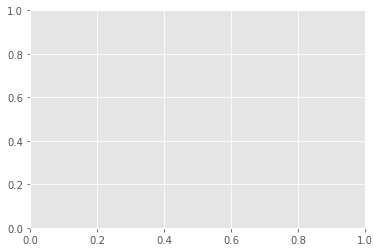

In [130]:
# Generating a KDE plot
a.plot.kde()

<br>

<br>

<br>

<br>

In [131]:
# Pivot table of top 5 course points by 2019
allcourses.sort_values(by=['points_r1_2021', 'title'], ascending=False).head()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8
RC005,Pharmacy,NaN,613.0,8,579.0,555.0,8
TR018,Law and French,NaN,602.0,8,565.0,NaN,8
TR006,Psychology,NaN,590.0,8,567.0,NaN,8
TR004,Law,NaN,589.0,8,566.0,532.0,8


<br>

<br>

In [132]:
# Pivot table of top 5 course points by 2019
allcourses.sort_values(by=['points_r1_2020', 'title'], ascending=False).head()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CR125,Popular Music at CIT Cork School of Music,NaN,NaN,8,1088.0,NaN,8
DL834,Film and Television Production,NaN,NaN,8,990.0,NaN,8
LC115,Art and Design Teacher Education (LIT and UL ...,NaN,NaN,8,942.0,NaN,NaN
DL830,Design for Stage and Screen (Character Makeup ...,NaN,NaN,8,939.0,NaN,8
DL832,Animation,NaN,NaN,8,920.0,NaN,8


<br>

<br>

In [133]:
# Pivot table of top 5 course points by 2019
allcourses.sort_values(by=['points_r1_2019', 'title'], ascending=False).head()

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8
CK702,Dentistry,NaN,NaN,8,613.0,590.0,8
DC116,Global Business (USA),NaN,NaN,8,579.0,578.0,8
CK703,Pharmacy,NaN,NaN,8,590.0,577.0,8
DN230,Actuarial and Financial Studies,NaN,NaN,8,601.0,577.0,8


<br>

<br>

In [134]:
x = allcourses.groupby(['level_2020'])[cols].agg([np.mean, np.std, np.min, np.max])

In [135]:
x

points_r1_2021                           points_r1_2020  \
                     mean         std   amin   amax           mean   
level_2020                                                           
6              190.800000   98.806350  113.0  476.0     235.283784   
7              190.223684   76.237453  100.0  485.0     245.714286   
8              375.021739  113.109017  176.0  625.0     393.800813   

                                      points_r1_2019                           
                   std   amin    amax           mean        std   amin   amax  
level_2020                                                                     
6            69.185183  149.0   473.0     220.500000  69.819917  128.0  454.0  
7            88.084202  100.0   781.0     219.894472  56.022397  100.0  393.0  
8           126.253491   55.0  1088.0     357.571429  88.627630  168.0  601.0

<br>

<AxesSubplot:ylabel='level_2020'>

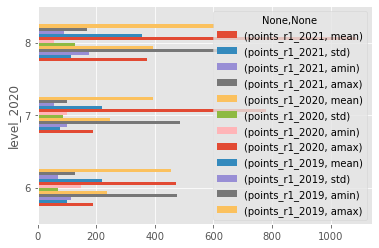

In [136]:
# Generating a barplot for the above pivot table
x.plot.barh()

<br>

<br>

<br>

In [137]:
# Overview of 2021 points
allcourses['points_r1_2021'].describe()

count    295.000000
mean     307.491525
std      133.665917
min      100.000000
25%      196.500000
50%      283.000000
75%      430.000000
max      625.000000
Name: points_r1_2021, dtype: float64

<br>

<br>

In [138]:
# Most points in 2021
allcourses['points_r1_2021'].max()

625.0

<br>

<br>

In [139]:
# Least points in 2021
allcourses['points_r1_2021'].min()

100.0

<br>

<br>

<br>

In [141]:
# Searching for that course
allcourses[allcourses['points_r1_2021'] == 625]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8


<br>

<br>

An increase of 80 points in 2 years. 

<br>

<br>

In [142]:
# Searching for that course
allcourses[allcourses['points_r1_2021'] == 100]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
PC404,Applied Social Studies - Professional Social Care,6/7,100.0,7,217.0,NaN,6/7
TL780,Early Childhood Care and Education,6/7,100.0,7,234.0,201.0,6/7


<br>

A massive 134 point drop from 2020.

<br>

<br>

In [143]:
# Overview of 2020 points
allcourses['points_r1_2020'].describe()

count    1387.000000
mean      350.217015
std       134.311616
min        55.000000
25%       252.000000
50%       316.000000
75%       430.500000
max      1088.000000
Name: points_r1_2020, dtype: float64

<br>

<br>

In [144]:
# Most points in 2020
allcourses['points_r1_2020'].max()

1088.0

<br>

<br>

In [145]:
# Least points in 2020
allcourses['points_r1_2020'].min()

55.0

<br>

<br>

<br>

In [146]:
# Searching for that course
allcourses[allcourses['points_r1_2020'] == 1088]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
CR125,Popular Music at CIT Cork School of Music,NaN,NaN,8,1088.0,NaN,8


<br>

<br>

The course with the most points was Popular Music at CIT Cork School of Music. This seems to be a new introduction in 2020, and it was in 2021 CAO.

<br>

<br>

In [147]:
# Searching for that course
allcourses[allcourses['points_r1_2020'] == 55]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
LM101,Medicine - Graduate Entry (GAMSAT required),NaN,NaN,8,55.0,NaN,8


<br>

<br>

The course with the lowest points is misleading as it requires a GAMSAT*. 

*Graduate Medical School Admissions Test (GAMSAT) "is a standardised exam designed, scored and developed by ACER to assist in the admissions of students to graduate-entry programmes (medicine, dentistry, optometry, pharmacy, podiatry) open to graduates of any discipline.GRADUATE ENTRY IRISH MEDICAL SCHOOLS. There are 4 medicals schools in Ireland which require the GAMSAT as part of their admissions criteria."

<br>

<br>

In [148]:
# Overview of 2019 points
allcourses['points_r1_2019'].describe()

count    1132.000000
mean      312.049470
std       100.867752
min       100.000000
25%       240.750000
50%       300.000000
75%       386.250000
max       601.000000
Name: points_r1_2019, dtype: float64

<br>

<br>

In [149]:
# Most points in 2019
allcourses['points_r1_2019'].max()

601.0

<br>

<br>

In [150]:
# Least points in 2019
allcourses['points_r1_2019'].min()

100.0

<br>

<br>

<br>

In [151]:
# Searching for that course
allcourses[allcourses['points_r1_2019'] == 601]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DN670,Economics and Finance,NaN,625.0,8,613.0,601.0,8


<br>

<br>

Intrestingly the points went down from 2020, which we can assume was the first year of Popular Music at CIT Cork School of Music as it is not present in 2019.

<br>

<br>

In [149]:
# Searching for that course
allcourses[allcourses['points_r1_2019'] == 100]

,title,level_2021,points_r1_2021,level_2020,points_r1_2020,points_r1_2019,level_2019
code,,,,,,,
DB576,Film and Creative Media,6/7,101.0,7,NaN,100.0,6/7
GC466,Film and TV Production,6/7,121.0,7,NaN,100.0,6/7


<br>

<br>

In [150]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)


<br>

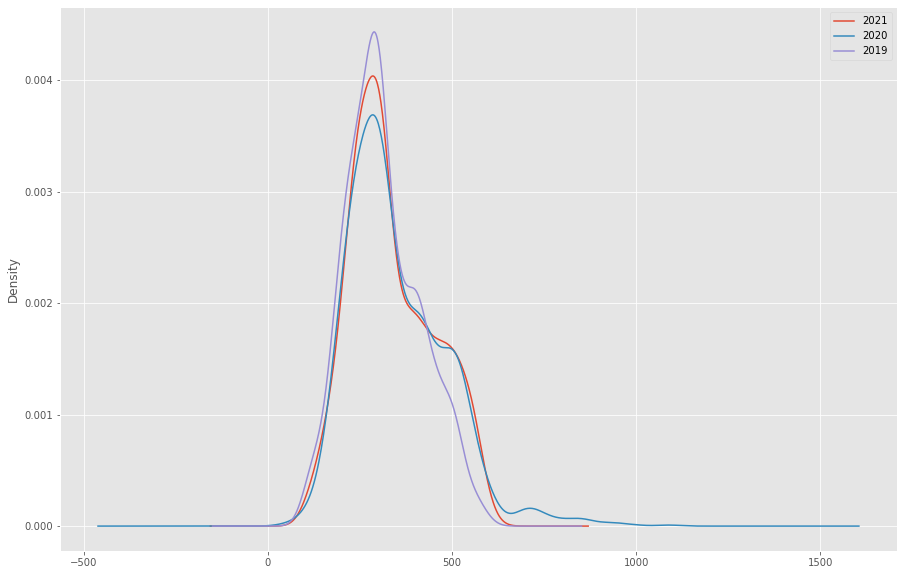

In [151]:
# Generating a kde plot for points 
allcourses['points_r1_2021'].plot.kde(label='2021')
allcourses['points_r1_2020'].plot.kde(label='2020')
allcourses['points_r1_2019'].plot.kde(label='2019')

# Adding a legend
plt.legend()

<br>

<br>

In [152]:
# Getting skew and kurtosis for 2021 points
print("2021 points skewness: %f" % allcourses['points_r1_2021'].skew())
print("2021 points kurtosis: %f" % allcourses['points_r1_2021'].kurt())

# Formatting
print('******************************')

# Getting skew and kurtosis for 2020 points
print("2020 points skewness: %f" % allcourses['points_r1_2020'].skew())
print("2020 points kurtosis: %f" % allcourses['points_r1_2020'].kurt())

# Formatting
print('******************************')

# Getting skew and kurtosis for 2019 points
print("2019 points skewness: %f" % allcourses['points_r1_2019'].skew())
print("2019 points kurtosis: %f" % allcourses['points_r1_2019'].kurt())

2021 points skewness: 0.418334
2021 points kurtosis: -0.690831
******************************
2020 points skewness: 1.134000
2020 points kurtosis: 2.156431
******************************
2019 points skewness: 0.426486
2019 points kurtosis: -0.342891


<br>

<br>

Let's create a scatterplot to compare 2020 and 2021 points. I'm going to use the 2020 level of the course because the CAO distingushed between the levels for 2020. Whereas for 2021 (and 2019) they didn't specify which was a level 6 and level 7 course.

<br>

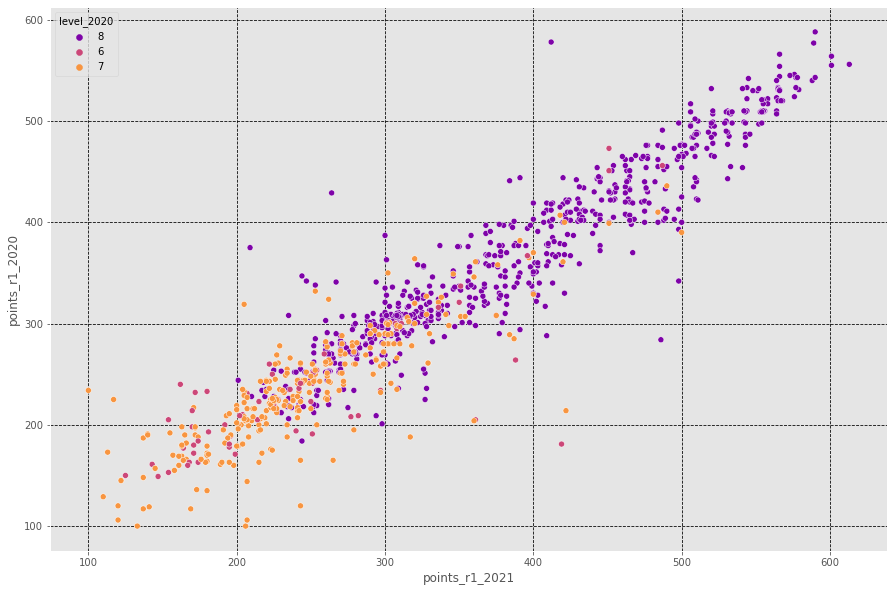

In [153]:
# Generating a scatterplot between 2020 and 2021 points.
sns.scatterplot(x=allcourses['points_r1_2021'], y=allcourses['points_r1_2020'], hue=allcourses['level_2020'], palette='plasma')

# Adding labels to axis
plt.xlabel('points_r1_2021')
plt.ylabel('points_r1_2020')

# Adding a grid
plt.grid(color='black',ls='--')

<br>

<br>

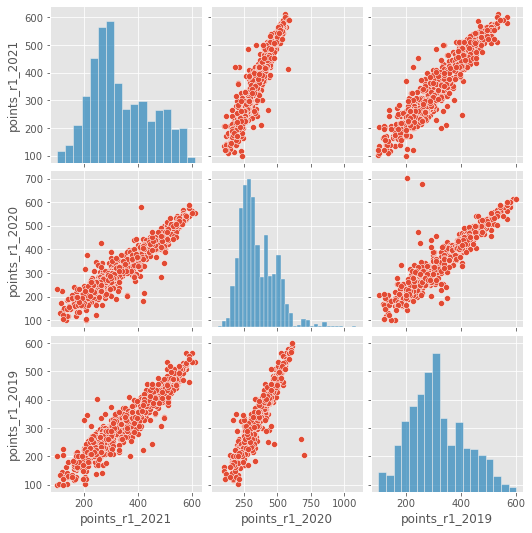

In [154]:
# Generating a pairplot
sns.pairplot(data=allcourses )

<br>

<br>

<br>

<br>

Similar to Excel, we can create pivot tables. Which takes the following parameters:

- values – a list of variables to calculate statistics for.
- index – a list of variables to group data by
- aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

<br>

<br>

In [155]:
allcourses.pivot_table(['points_r1_2021', 'points_r1_2020', 'points_r1_2019'],['level_2020'], aggfunc='max')

,points_r1_2019,points_r1_2020,points_r1_2021
level_2020,,,
6,454.0,473.0,487.0
7,393.0,781.0,500.0
8,601.0,1088.0,613.0


<br>

<br>

In [156]:
allcourses.pivot_table(['points_r1_2021', 'points_r1_2020', 'points_r1_2019'],['level_2020'], aggfunc='min')

,points_r1_2019,points_r1_2020,points_r1_2021
level_2020,,,
6,128.0,149.0,120.0
7,100.0,100.0,100.0
8,168.0,55.0,201.0


<br>

<br>

In [157]:
allcourses.pivot_table(['points_r1_2021', 'points_r1_2020', 'points_r1_2019'],['level_2020'], aggfunc='mean')

,points_r1_2019,points_r1_2020,points_r1_2021
level_2020,,,
6,220.500000,235.283784,239.926471
7,219.894472,245.714286,244.000000
8,357.571429,393.800813,382.170300


<br>

<br>

<br>

In [158]:
allcourses.pivot_table(['points_r1_2021', 'points_r1_2020', 'points_r1_2019'],['level_2020'], aggfunc='median')

,points_r1_2019,points_r1_2020,points_r1_2021
level_2020,,,
6,204.5,223.0,223.0
7,217.0,233.0,236.0
8,338.0,368.0,368.0


<br>

<br>

<br>

<br>

In [159]:
corr = allcourses.corr()

In [160]:
corr

,points_r1_2021,points_r1_2020,points_r1_2019
points_r1_2021,1.000000,0.951956,0.938863
points_r1_2020,0.951956,1.000000,0.938230
points_r1_2019,0.938863,0.938230,1.000000


<AxesSubplot:>

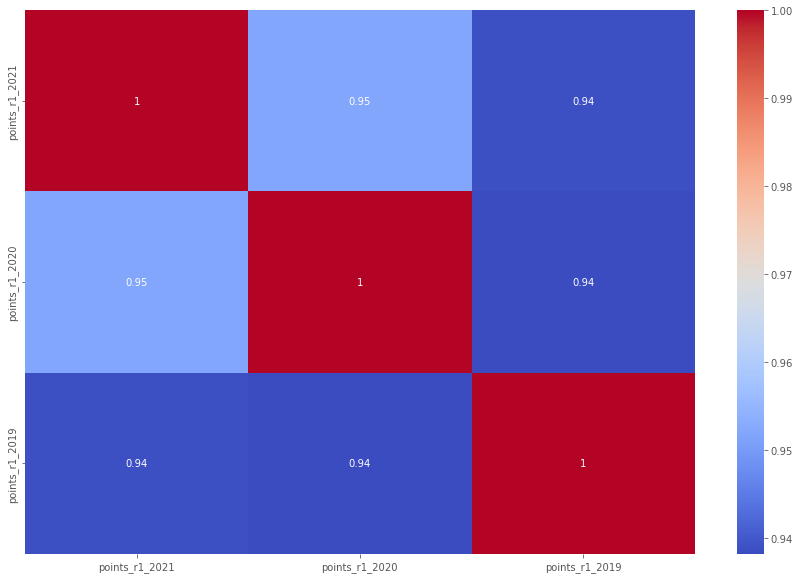

In [161]:
sns.heatmap(corr, cmap='coolwarm', annot=True)

<br>

<br>

In [162]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

<br>

<br>

C:\Users\katie\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points_r1_2021', ylabel='Density'>

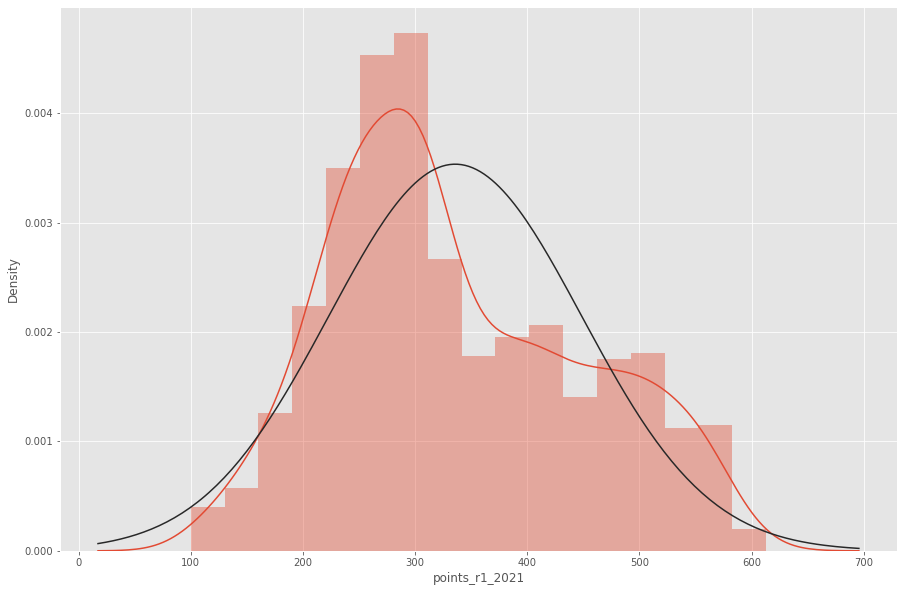

In [163]:
sns.distplot(allcourses[allcourses['points_r1_2021']>0]['points_r1_2021'], fit=norm)


((array([-3.23890513, -2.97682527, -2.83077384, ...,  2.83077384,
          2.97682527,  3.23890513]),
  array([100., 101., 108., ..., 601., 601., 613.])),
 (111.10645501936642, 335.7982683982684, 0.9821855291724294))

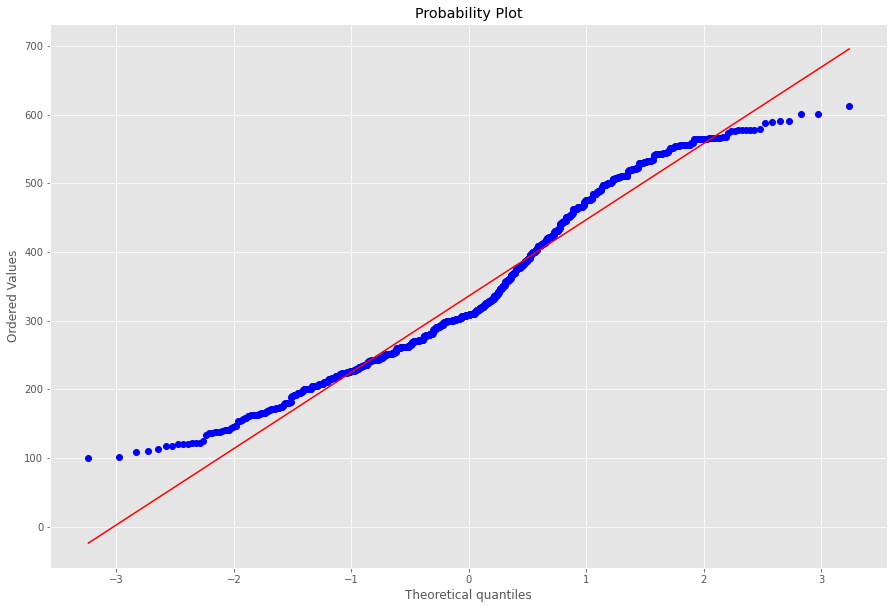

In [164]:

stats.probplot(allcourses[allcourses['points_r1_2021']>0]['points_r1_2021'], plot=plt)

<AxesSubplot:>

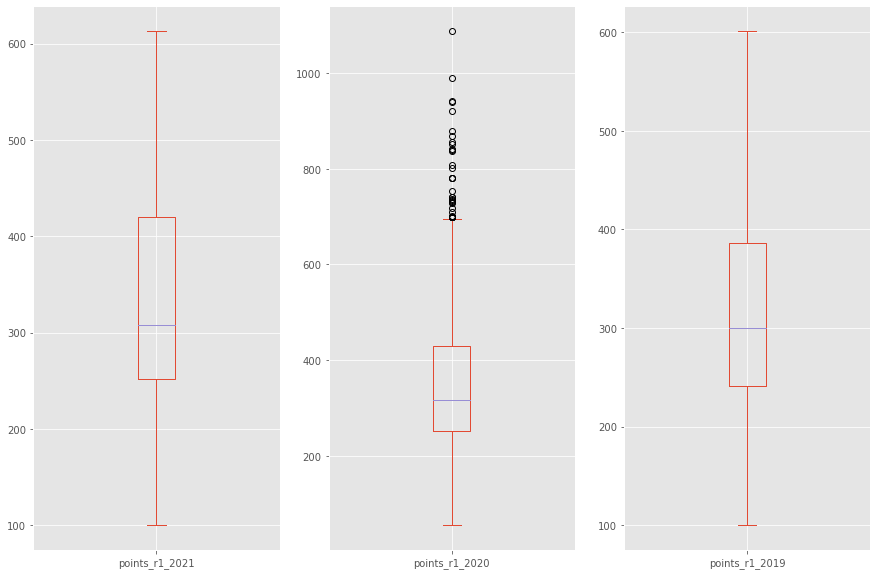

In [165]:
# nrows, ncols, the first plot
plt.subplot(1,3,1)
(allcourses['points_r1_2021']).plot.box()

# nrows, ncols, the second plot
plt.subplot(1,3,2)
(allcourses['points_r1_2020']).plot.box()

# nrows, ncols, the thrid plot
plt.subplot(1,3,3)
(allcourses['points_r1_2019']).plot.box()


<br>

<br>

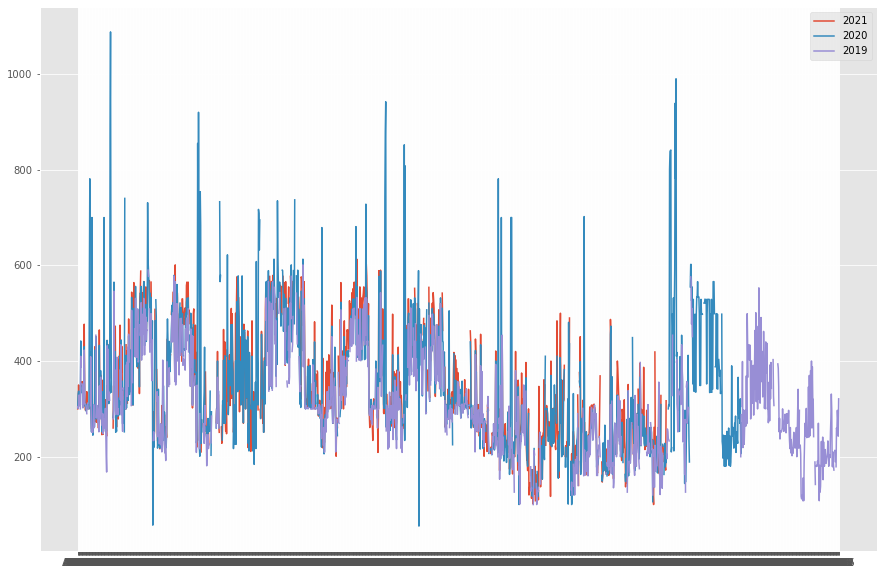

In [166]:

plt.plot(allcourses["points_r1_2021"], label='2021')
plt.plot(allcourses["points_r1_2020"], label='2020')
plt.plot(allcourses["points_r1_2019"], label='2019')

plt.legend()

<br>

<br>

.plot() is a wrapper for pyplot.plot(), and the result is a graph identical to the one you produced with Matplotlib https://realpython.com/pandas-plot-python/

<br>

<br>

In [167]:
median_2021 = allcourses["points_r1_2021"]

<AxesSubplot:ylabel='Frequency'>

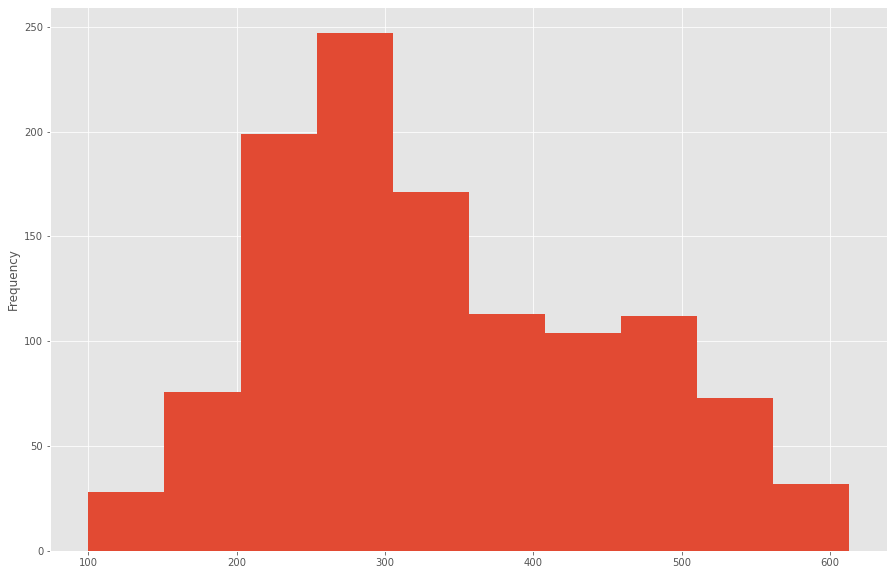

In [168]:
median_2021.plot(kind='hist')

In [169]:
median_2020 = allcourses["points_r1_2020"]

<AxesSubplot:ylabel='Frequency'>

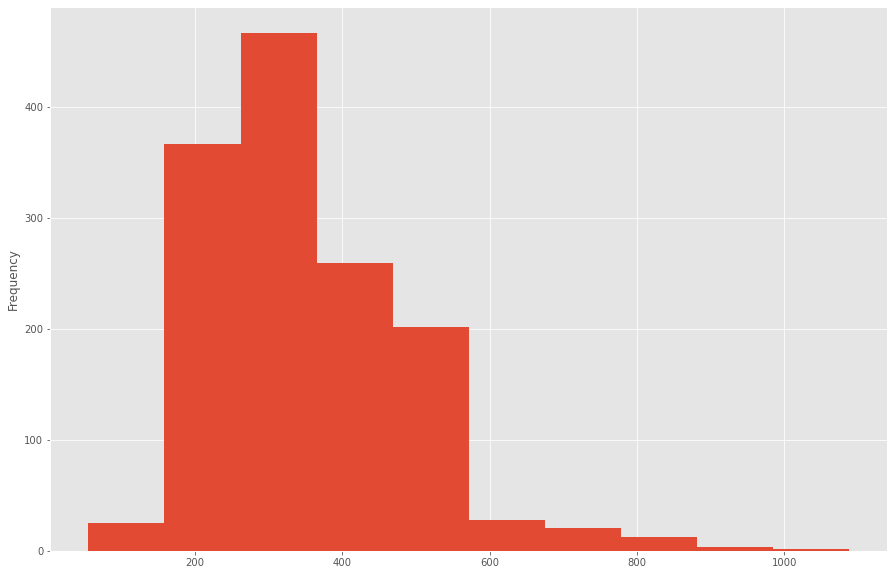

In [170]:
median_2020.plot(kind='hist')

In [171]:
median_2019 = allcourses["points_r1_2019"]

<AxesSubplot:ylabel='Frequency'>

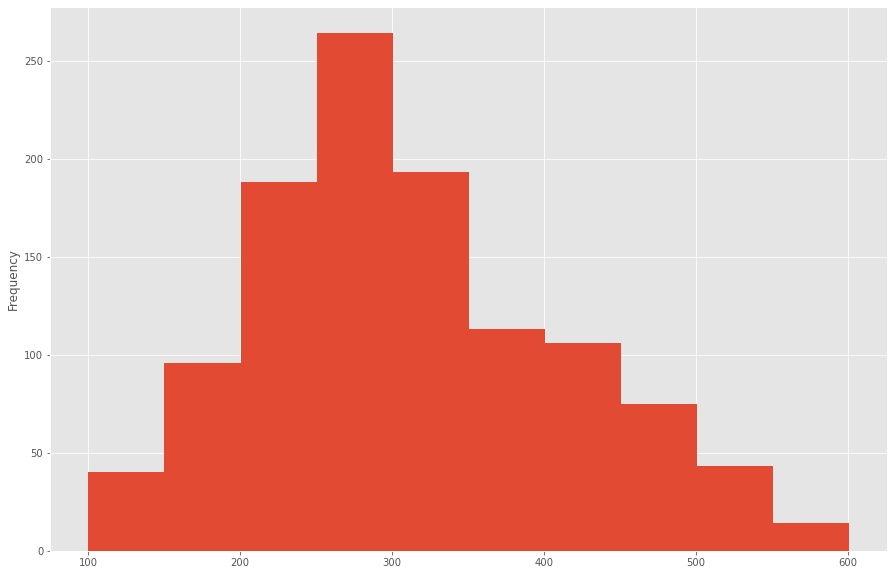

In [172]:
median_2019.plot(kind='hist')

<br>

<br>

<br>

<br>

<br>

<br>

## References

#### Images

- [CAO Logo](https://www.icareer.ie/wp-content/uploads/2016/12/Untitled-1.jpg)

# End